# Feature Selection using Mutual Information Scores 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd

df1 = pd.read_csv("train_titanic.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Separate X and Y

In [8]:
X = df1.drop(labels=['PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)

Y = df1[['Survived']]

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


### Separate Cat and Con Features

In [10]:
cat = list(X.columns[X.dtypes == 'object'])

con = list(X.columns[X.dtypes != 'object'])

In [11]:
cat

['Sex', 'Cabin', 'Embarked']

In [12]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Create a simple Sklearn pipeline for Feature Selection

1. Ordinal Encoder : Categorical Features

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe, con),
                          ('cat', cat_pipe, cat)])

In [16]:
X_pre = pre1.fit_transform(X)
X_pre

array([[  0.82737724,  -0.5924806 ,   0.43279337, ...,   1.        ,
        147.        ,   2.        ],
       [ -1.56610693,   0.63878901,   0.43279337, ...,   0.        ,
         81.        ,   0.        ],
       [  0.82737724,  -0.2846632 ,  -0.4745452 , ...,   0.        ,
        147.        ,   2.        ],
       ...,
       [  0.82737724,   0.        ,   0.43279337, ...,   0.        ,
        147.        ,   2.        ],
       [ -1.56610693,  -0.2846632 ,  -0.4745452 , ...,   1.        ,
         60.        ,   0.        ],
       [  0.82737724,   0.17706291,  -0.4745452 , ...,   1.        ,
        147.        ,   1.        ]])

In [17]:
cols = pre1.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [18]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,1.0,147.0,2.0
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,0.0,30.0,2.0
888,0.827377,0.000000,0.432793,2.008933,-0.176263,0.0,147.0,2.0
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,1.0,60.0,0.0


### Calculating Mutual Information Scores

In [19]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.06156937, 0.03543082, 0.03659289, 0.        , 0.12176987,
       0.12688161, 0.06297858, 0.00590407])

In [20]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.126882
num__Fare        0.121770
cat__Cabin       0.062979
num__Pclass      0.061569
num__SibSp       0.036593
num__Age         0.035431
cat__Embarked    0.005904
num__Parch       0.000000
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

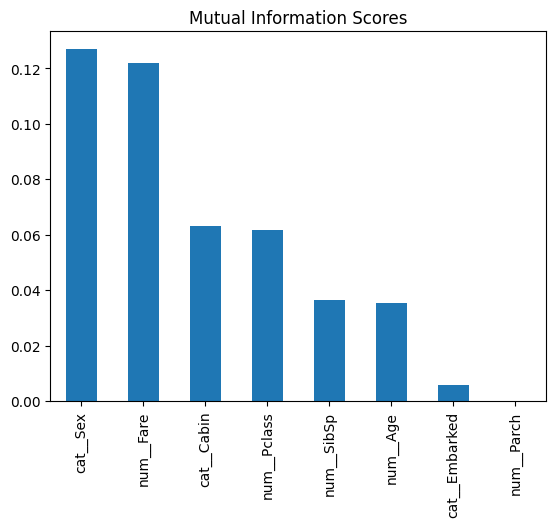

In [21]:
mi.plot(kind = "bar", title='Mutual Information Scores')

In [22]:
sel_cols = list(mi[0:6].index)
sel_cols

['cat__Sex',
 'num__Fare',
 'cat__Cabin',
 'num__Pclass',
 'num__SibSp',
 'num__Age']

In [24]:
#Approach 2 select top n features

from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif, k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [25]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Fare', 'cat__Sex',
       'cat__Cabin'], dtype=object)

In [26]:
sel_cols[0].split('__')[1]

'Pclass'

In [27]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [28]:
imp_cols

['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Cabin']

In [29]:
X_sel = X[imp_cols]
X_sel

,Pclass,Age,SibSp,Fare,Sex,Cabin
0,3,22.0,1,7.2500,male,NaN
1,1,38.0,1,71.2833,female,C85
2,3,26.0,0,7.9250,female,NaN
3,1,35.0,1,53.1000,female,C123
4,3,35.0,0,8.0500,male,NaN
...,...,...,...,...,...,...
886,2,27.0,0,13.0000,male,NaN
887,1,19.0,0,30.0000,female,B42
888,3,NaN,1,23.4500,female,NaN
889,1,26.0,0,30.0000,male,C148


### Cat, Con For Selected Features

In [31]:
cat_sel = list(X_sel.columns[X_sel.dtypes == 'object'])
con_sel = list(X_sel.columns[X_sel.dtypes != 'object'])

In [32]:
cat_sel

['Sex', 'Cabin']

In [33]:
con_sel

['Pclass', 'Age', 'SibSp', 'Fare']

### Create a Final Pipeline

In [34]:
from sklearn.preprocessing import OneHotEncoder

num_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [35]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.82737724, -0.5924806 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.63878901,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.2846632 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.17706291, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [36]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Cabin_A10',
       'cat__Cabin_A14', 'cat__Cabin_A16', 'cat__Cabin_A19',
       'cat__Cabin_A20', 'cat__Cabin_A23', 'cat__Cabin_A24',
       'cat__Cabin_A26', 'cat__Cabin_A31', 'cat__Cabin_A32',
       'cat__Cabin_A34', 'cat__Cabin_A36', 'cat__Cabin_A5',
       'cat__Cabin_A6', 'cat__Cabin_A7', 'cat__Cabin_B101',
       'cat__Cabin_B102', 'cat__Cabin_B18', 'cat__Cabin_B19',
       'cat__Cabin_B20', 'cat__Cabin_B22', 'cat__Cabin_B28',
       'cat__Cabin_B3', 'cat__Cabin_B30', 'cat__Cabin_B35',
       'cat__Cabin_B37', 'cat__Cabin_B38', 'cat__Cabin_B39',
       'cat__Cabin_B4', 'cat__Cabin_B41', 'cat__Cabin_B42',
       'cat__Cabin_B49', 'cat__Cabin_B5', 'cat__Cabin_B50',
       'cat__Cabin_B51 B53 B55', 'cat__Cabin_B57 B59 B63 B66',
       'cat__Cabin_B58 B60', 'cat__Cabin_B69', 'cat__Cabin_B71',
       'cat__Cabin_B73', 'cat__Cabin_B77', 'cat__Cabin_B78',
       'cat__Cabin_B79

In [37]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre

,num__Pclass,num__Age,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,-0.592481,0.432793,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.827377,0.407926,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.386671,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.823344,-0.474545,-0.044381,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.827377,0.000000,0.432793,-0.176263,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.284663,-0.474545,-0.044381,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

### Create a final Model on Gradient Boost Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=21)

In [41]:
# Checking the Accuracy for train set

gbc.score(xtrain, ytrain)

0.8918539325842697

In [42]:
# Checking the Accuracy for test set

gbc.score(xtest, ytest)

0.8044692737430168

### Perform Hypermeter Tuning

1. GridSearchCV(Slower)
2. RandomizedSearchCV(Faster)

In [45]:
params = {'learning_rate' : [0.01, 0.05, 0.1, 0.2],
          'max_depth': [2,3,4,5,6,7,8],
          'min_samples_split' : [2,3,4,5,6,7,8,9,10]}

In [46]:
from sklearn.model_selection import RandomizedSearchCV
base_gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(base_gbc, param_distributions=params, cv = 5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=21, scoring='f1')

In [47]:
rscv.best_params_

{'min_samples_split': 4, 'max_depth': 5, 'learning_rate': 0.1}

In [48]:
rscv.best_score_

0.7678591178406847

In [52]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=5, min_samples_split=4, random_state=21)

### Evaluate the Model

In [53]:
best_gbc.score(xtrain, ytrain)

0.925561797752809

In [54]:
best_gbc.score(xtest, ytest)

0.8044692737430168

### Predict train and test data

In [55]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [56]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [57]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [58]:
ypred_ts[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [60]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


### Confusion Matrix

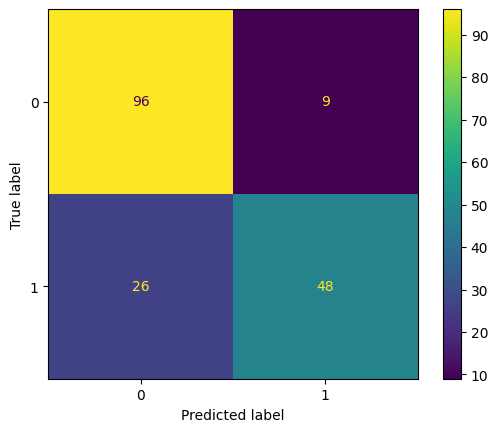

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

### Classification Report

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       105
           1       0.84      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



### Selected the model for final Predicions

### Perform predictions on test_titanic.csv

In [63]:
xnew = pd.read_csv("test_titanic.csv")
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [64]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [65]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [66]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724,  0.36944878, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  1.33137817,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.48569343, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724,  0.67726619, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.        , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.        ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ]])

In [67]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,...,cat__Cabin_F E69,cat__Cabin_F G63,cat__Cabin_F G73,cat__Cabin_F2,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown
0,0.827377,0.369449,-0.474545,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.827377,1.331378,0.432793,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.369365,2.485693,-0.474545,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.827377,-0.207709,-0.474545,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,-0.592481,0.432793,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,0.000000,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,-1.566107,0.715743,-0.474545,1.544246,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.827377,0.677266,-0.474545,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.827377,0.000000,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Perform Predictions

In [68]:
pred = best_gbc.predict(xnew_pre)
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob

array([0.09344563, 0.50819202, 0.14058973, 0.19769298, 0.40740863,
       0.10854157, 0.6115115 , 0.15074799, 0.88109705, 0.11625094,
       0.0937503 , 0.06981479, 0.96203521, 0.06920212, 0.96460404,
       0.94413057, 0.10004892, 0.15927768, 0.50736315, 0.63818057,
       0.08618958, 0.24625955, 0.95964697, 0.11999679, 0.96157001,
       0.06981479, 0.9619884 , 0.15927768, 0.27933055, 0.10825838,
       0.06981479, 0.1138267 , 0.73770968, 0.09752317, 0.36839209,
       0.15592701, 0.3419647 , 0.27204277, 0.10038737, 0.38575391,
       0.0892778 , 0.28021482, 0.09344563, 0.94065816, 0.97446409,
       0.15944151, 0.16087634, 0.11320216, 0.9664734 , 0.80602352,
       0.25874528, 0.22508586, 0.94677219, 0.95099743, 0.10825838,
       0.05403471, 0.07709347, 0.09546644, 0.10825838, 0.97015103,
       0.09852829, 0.18964532, 0.11884151, 0.80186137, 0.23713455,
       0.93761085, 0.51139718, 0.05670851, 0.28021482, 0.96157001,
       0.57816419, 0.10079282, 0.66457884, 0.28021482, 0.97015

### Save this values in dataframe

In [70]:
df1_results = xnew[['PassengerId']]
df1_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [71]:
df1_results['Survived'] = pred
df1_results['Probability'] = prob

In [72]:
df1_results

,PassengerId,Survived,Probability
0,892,0,0.093446
1,893,1,0.508192
2,894,0,0.140590
3,895,0,0.197693
4,896,0,0.407409
...,...,...,...
413,1305,0,0.093370
414,1306,1,0.970151
415,1307,0,0.087202
416,1308,0,0.093370


In [73]:
df1_results['Survived'].value_counts()

Survived
0    280
1    138
Name: count, dtype: int64

<Axes: xlabel='Survived'>

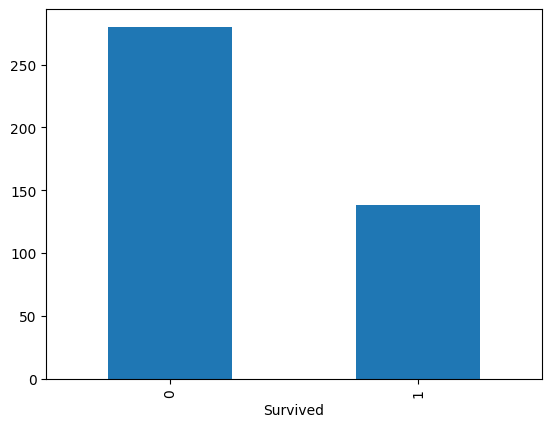

In [74]:
df1_results['Survived'].value_counts().plot(kind="bar")

In [75]:
df1_results.to_csv('Results.csv', index=False)